In [69]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import pickle

In [9]:
def load2d(fname):
    pts = np.loadtxt(fname)
    return pts

def plot(*pcs, labels=None, scale=1.2, s=0.8, subplot=False, ticks=False, ticklabels=False):
    num_pcs = len(pcs)
    max_cols = 8  # Set the maximum number of columns based on the available space
    fig_cols = min(num_pcs, max_cols)
    fig_rows = int(np.ceil(num_pcs / fig_cols))

    fig_width = 100 / 72  # Set the width of each subplot
    fig_height = 100 / 72  # Set the height of each subplot

    fig = plt.figure(figsize=(fig_width * fig_cols * 3, fig_height * fig_rows * 3))
    gs = GridSpec(fig_rows, fig_cols, figure=fig)

    def configure_axes(ax):
        ax.set_xlim([-scale, scale])
        ax.set_ylim([-scale, scale])

        if not ticks:
            ax.set_xticks([])
            ax.set_yticks([])
        if not ticklabels:
            ax.set_xticklabels([])
            ax.set_yticklabels([])

    if subplot:
        for idx, pc in enumerate(pcs):
            ax = fig.add_subplot(gs[idx // fig_cols, idx % fig_cols])

            ax.scatter(pc[:, 0], pc[:, 1], s=s, alpha=0.6, label=labels[idx] if labels else None)
            configure_axes(ax)

            if labels:
                ax.set_title(labels[idx])

    else:
        ax = fig.add_subplot(gs[:, :])
        colors = plt.cm.copper(np.linspace(0, 1, num_pcs))

        for i, pc in enumerate(pcs):
            ax.scatter(pc[:, 0], pc[:, 1], s=1.5, color=colors[i], alpha=0.6, label=labels[i] if labels else None)

        configure_axes(ax)

        if labels:
            ax.legend(labels, markerscale=3)

    plt.tight_layout()
    plt.show()

In [4]:
def add_noise(pc, p=5, scale=1.2):
    n_noise = int(p / 100 * pc.shape[0])
    noise = np.random.uniform(low=-scale, high=scale, size=(n_noise, pc.shape[1]))
    data = np.concatenate((pc, noise))

    return data


def toRad(deg):
    return np.radians(deg)


def make_rot(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])


def transform_pc(pc, rot=None, scale=None, shift=None):
    pc_c = pc.copy()

    if rot is not None:
        pc_c = np.dot(pc_c, rot)

    if scale is not None:
        pc_c *= scale

    if shift is not None:
        pc_c += shift

    return pc_c

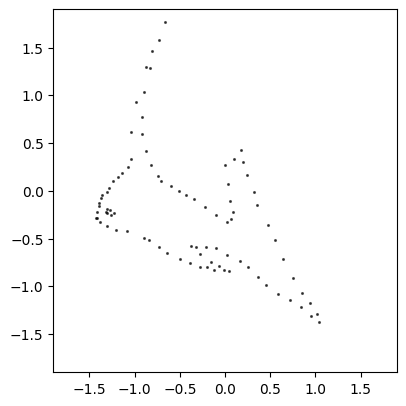

In [24]:
f = load2d('fish_source.txt')
plot(f, scale=1.9,s=10, ticks=True, ticklabels=True)

In [44]:
theta = toRad(55.0)
rot = make_rot(theta)
scale = np.array([1,1])
shift = np.array([1,2])

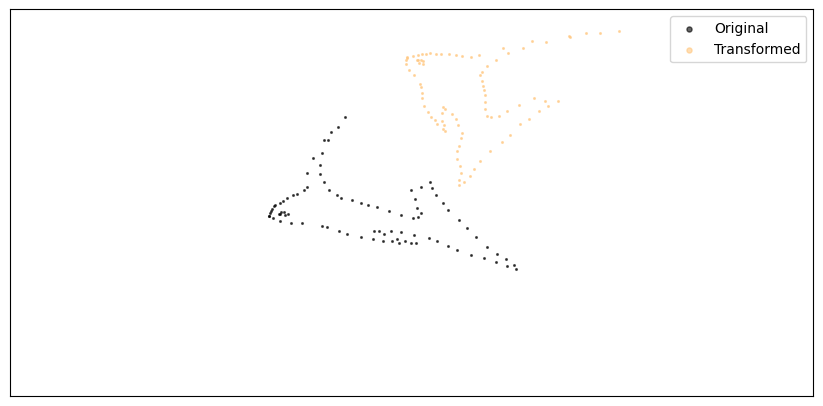

In [45]:
X = transform_pc(f, rot, scale, shift)
plot(f, X, labels=['Original', 'Transformed'], scale=4)

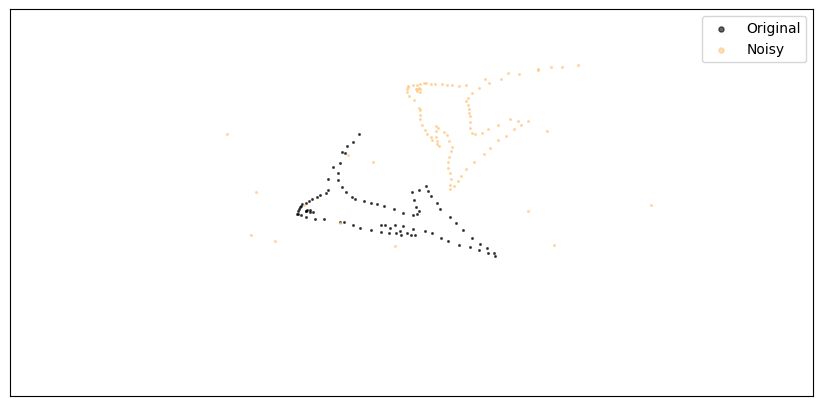

In [68]:
Xn = add_noise(X, p=15, scale=3)
plot(f, Xn, labels=['Original', 'Noisy'], scale=5)

In [95]:
def generate_dict(pc, key_prefix, percentages):
    d = {}
    
    for p in percentages:
        n_key = f"{key_prefix}{p}" if p != 0 else f"{key_prefix}0"
        d[n_key] = add_noise(src, p)
    
    return d

def saveD(d, fname):
    with open(fname, 'w') as f:
        for key in d:
            f.write(f"{key}\n")
            np.savetxt(f, d[key], fmt='%.8f')
            f.write("\n")

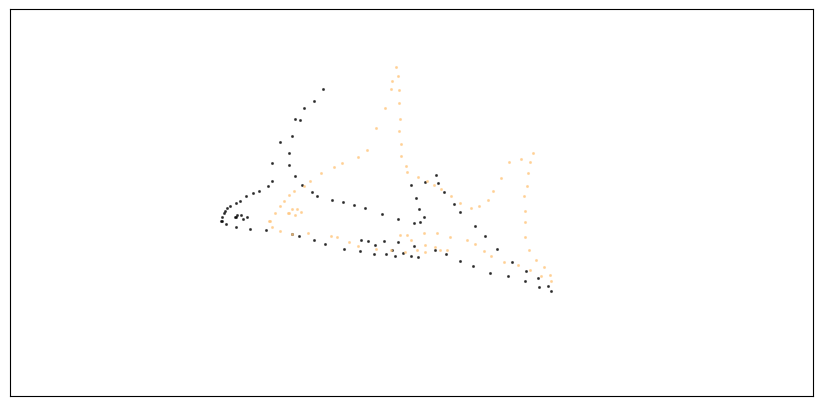

In [96]:
src = load2d('fish_source.txt')
tar = load2d('fish_target.txt')
plot(src,tar, scale=3, s=20)

In [97]:
n_percentages = [0, 10, 20, 30, 40]
Xs = generate_dict(src, 'X', n_percentages)
Ys = generate_dict(tar, 'Y', n_percentages)
saveD(Xs, 'fsource.txt')
saveD(Ys, 'ftarget.txt')

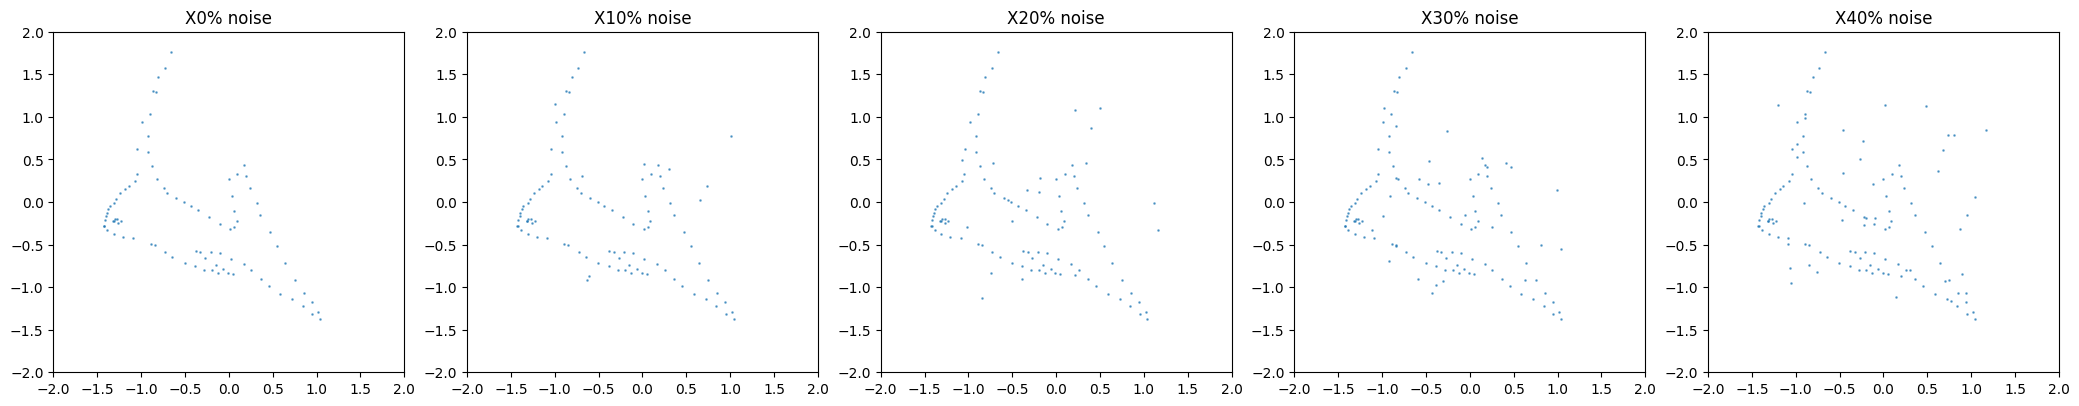

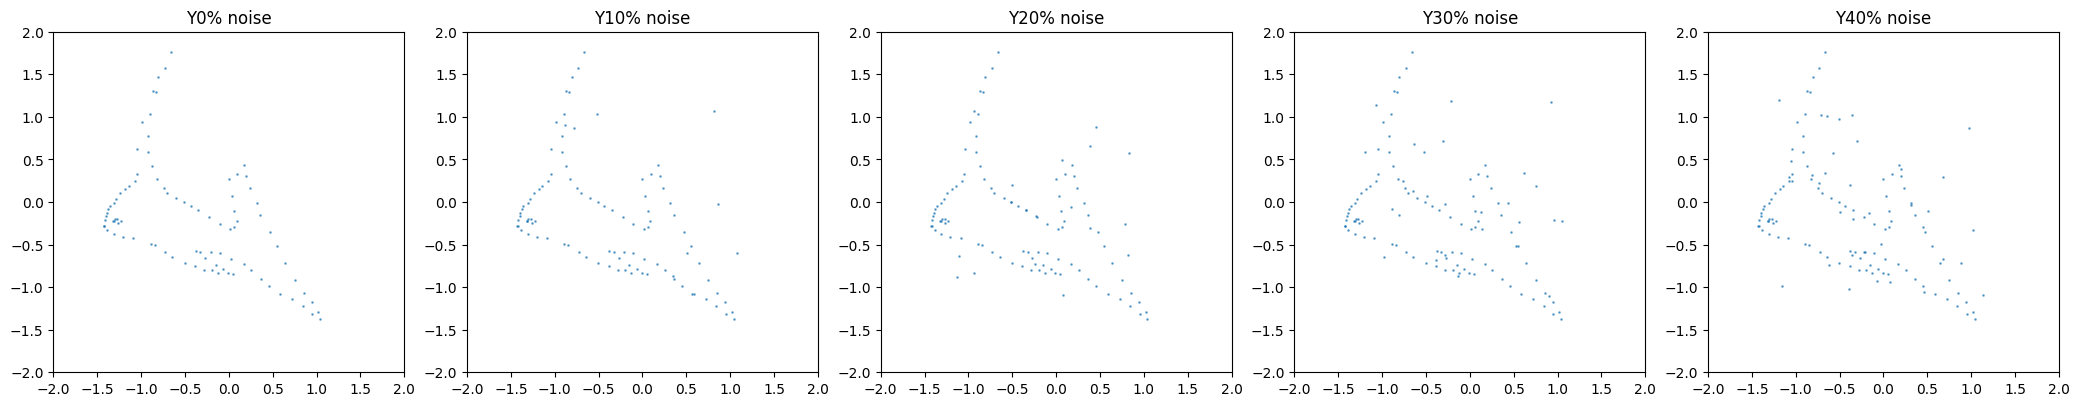

In [99]:
dX = [Xs[f"X{p}" if p != 0 else 'X0'] for p in n_percentages]
dY = [Ys[f"Y{p}" if p != 0 else 'Y0'] for p in n_percentages]
labels_X = [f"X{p}% noise" for p in n_percentages]
labels_Y = [f"Y{p}% noise" for p in n_percentages]

plot(*dX, labels=labels_X, scale=2, subplot=True, ticks=True, ticklabels=True)
plot(*dY, labels=labels_Y, scale=2, subplot=True, ticks=True, ticklabels=True)